# Eigenfaces
We used the `faces94` dataset for this implementation: https://cswww.essex.ac.uk/mv/allfaces/faces94.zip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

## Enrollment Process

In [2]:
ids = ['9336923','9338535','anpage','asamma','asewil','astefa','drbost','ekavaz','elduns',
                  'kaknig','klclar','ksunth','lfso','mbutle','phughe','sbains','slbirc','vstros','yfhsie',
      'anonym','anonym1','anonym2','cwang','doraj','fordj','hartb','hensm','ieorf','lyond','macci',
                    'martin','michael','moors','obeidn','robin','sandm','spacl','tony','voudcx'
      ]

In [3]:
f94 = {'female': ['9336923','9338535','anpage','asamma','asewil','astefa','drbost','ekavaz','elduns',
                  'kaknig','klclar','ksunth','lfso','mbutle','phughe','sbains','slbirc','vstros','yfhsie'],
      'malestaff': ['anonym','anonym1','anonym2','cwang','doraj','fordj','hartb','hensm','ieorf','lyond','macci',
                    'martin','michael','moors','obeidn','robin','sandm','spacl','tony','voudcx']}

For each set of faces, we take the first one and add it to the training set.

In [4]:
base = [Image.open(f'faces94/faces94/{cat}/{p}/{p}.1.jpg').convert('L')  for cat in f94 for p in f94[cat]]

In [5]:
M = len(base)

In [6]:
X = np.array([base[i].getdata() for i in range(M)])

In [7]:
mean = np.mean(X, 0)

In [8]:
phi = X - mean

We compute for the eigenvalues and eigenvectors using singular value decomposition.

In [9]:
e_faces, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False)

In [21]:
weights = [np.dot(X[i]-mean, e_faces) for i in range(M)]

In [22]:
np.shape(weights)

(39, 39)

This is what the first eigenface looks like.

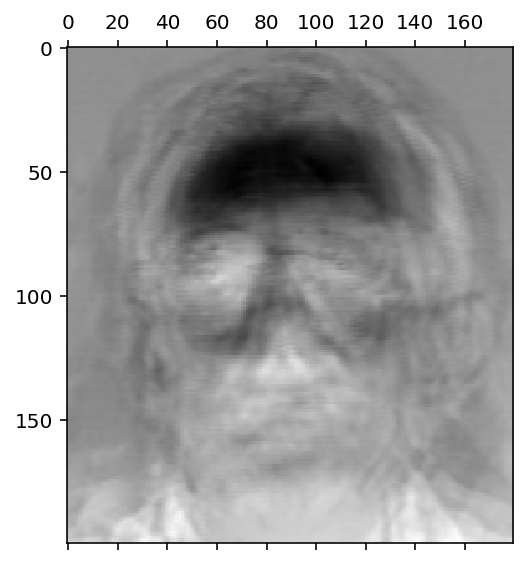

In [10]:
display(plt.matshow(np.reshape(e_faces.T[0], (200,180)), cmap='gray'))

## Face Recognition

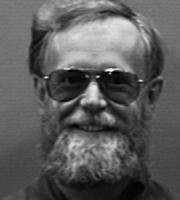

In [11]:
input_img = Image.open(f'faces94/faces94/malestaff/spacl/spacl.19.jpg').convert('L')
input_img

### Projection

In [12]:
gamma = np.array(input_img.getdata())

In [13]:
test_phi = gamma - mean

In [14]:
test_weights = np.dot(test_phi, e_faces)

### Distance computation

In [15]:
dist = [np.linalg.norm(phi[i] - test_phi) for i in range(M)]
d_min = np.min(dist)

### Match finding

In [16]:
threshold = 7000

In [17]:
if d_min < threshold:
    name = ids[np.argmin(dist)]
    print(f'{name}\ndist={d_min}')
else:
    print('No match found.')

spacl
dist=6604.41185875018


## Visualization of the face space
We plot the projections of each training image onto the face space spanned by the first two eigenfaces. The projected input image is represented in the plot as a square.

In [18]:
def identify(img):
    gamma = np.array(img.getdata())
    test_phi = gamma - mean
    test_weights = np.dot(test_phi, e_faces)
    return test_weights[0:2]

In [19]:
plt.style.use('fivethirtyeight')

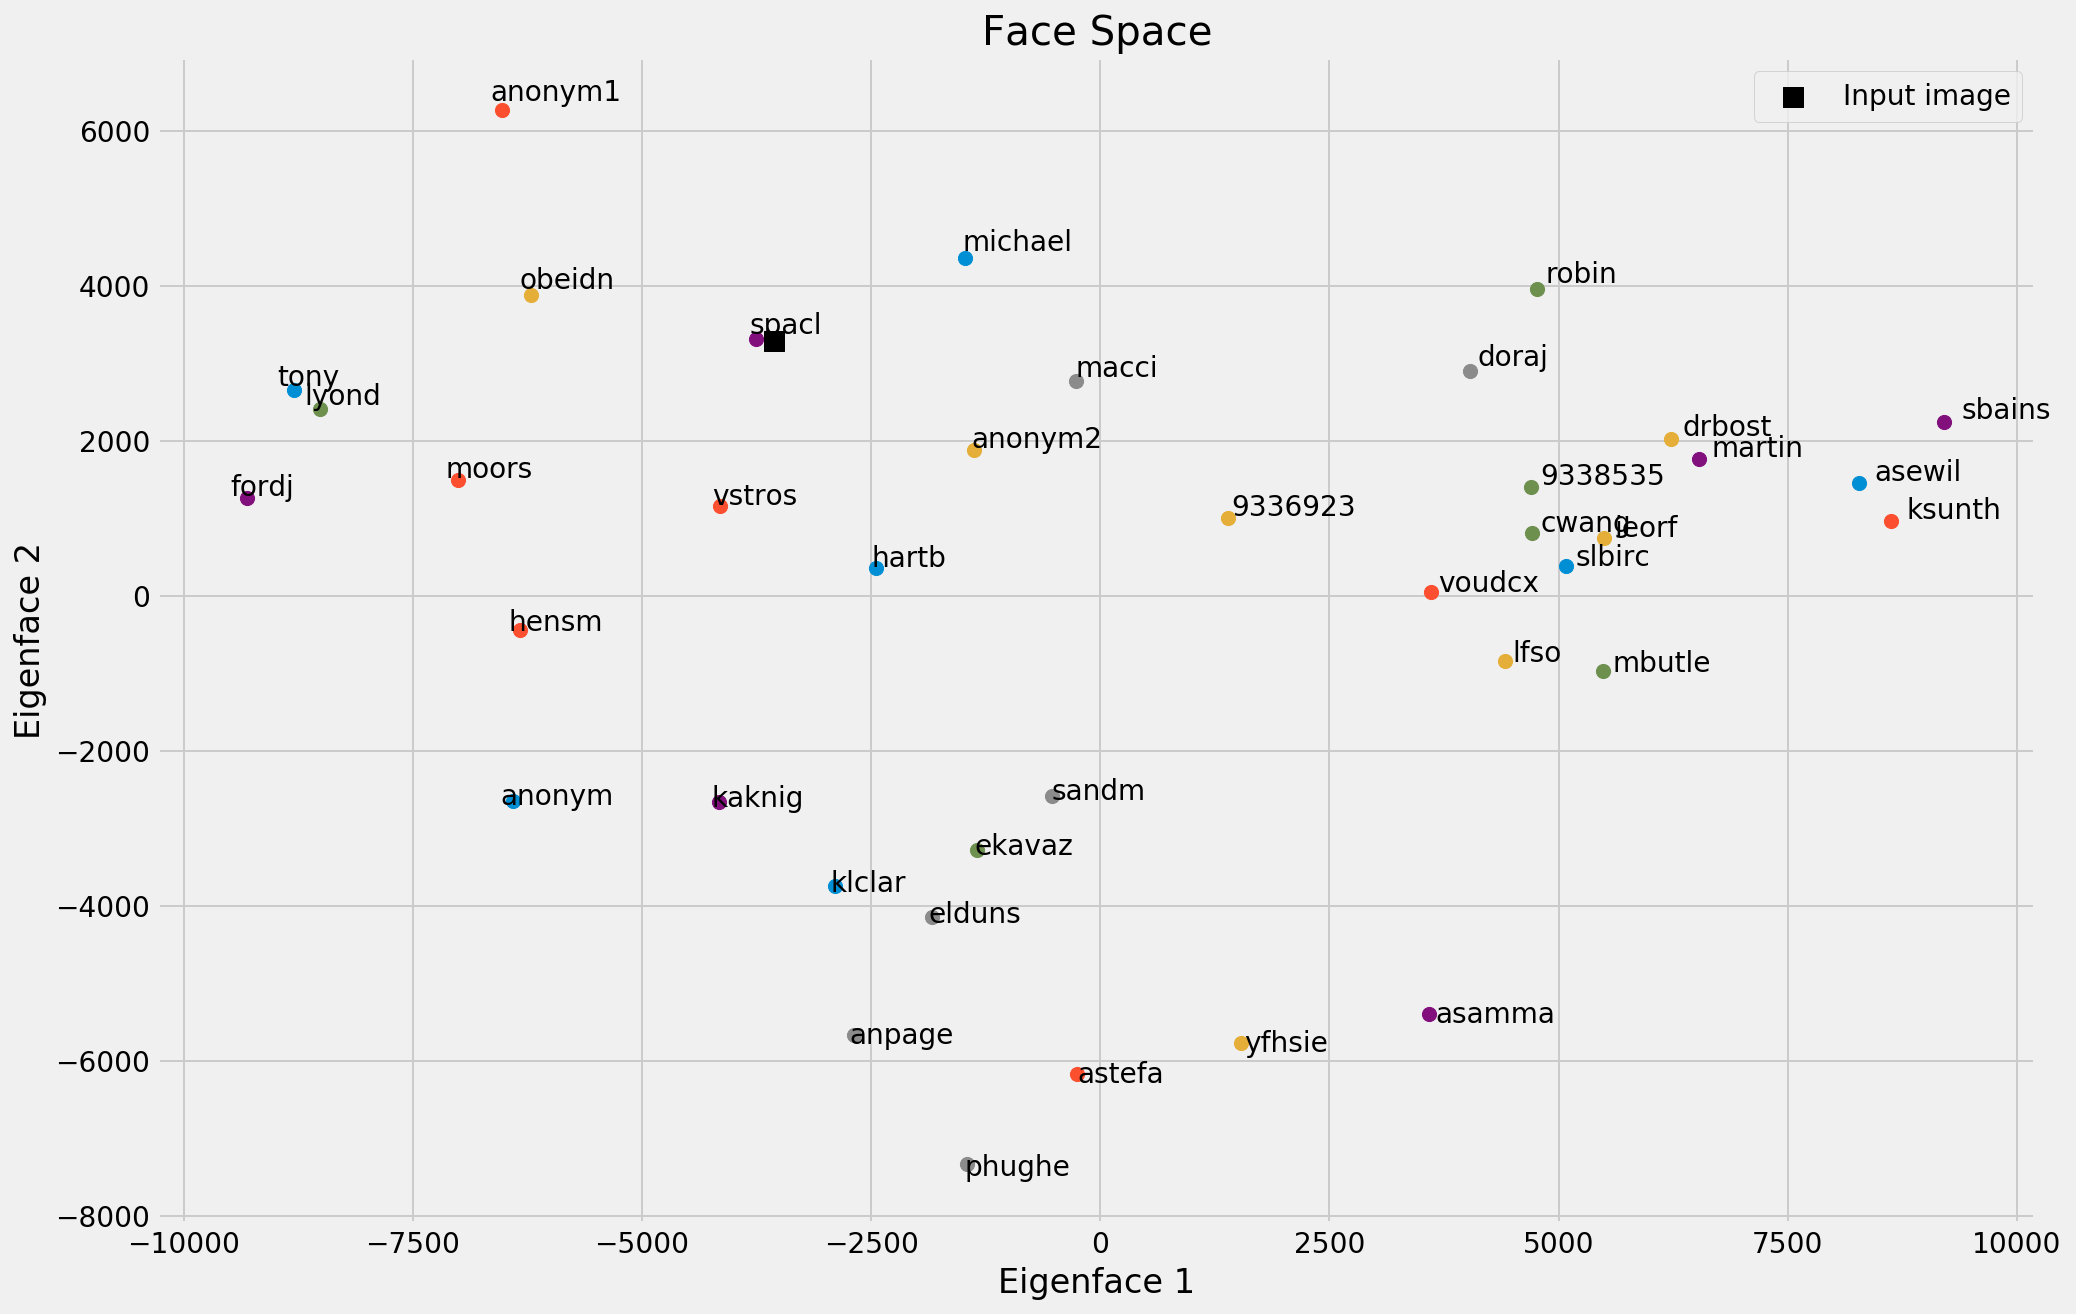

In [20]:
plt.figure(figsize=(15,10))
i = 0
for faceclass in ['malestaff','female']:
    for setname in f94[faceclass]:
        iset = [Image.open(f'faces94/faces94/{faceclass}/{setname}/{setname}.{i}.jpg').convert('L') for i in range(1,2)]
        x, y = np.array([identify(pic) for pic in iset]).T
        plt.scatter(x,y, s=50)
        plt.text(x * (1 + 0.02), y * (1 + 0.02), setname)
        i += 1
plt.scatter(*identify(input_img), label='Input image', marker=',', c='k', s=100)
plt.xlabel('Eigenface 1')
plt.ylabel('Eigenface 2')
plt.title('Face Space')
plt.legend(frameon=True)